# Obtaining the porosity profile along each principle axis
This example illustrates how to use the ``porosity_profile`` function to study the distribution of porosity in a sample.  

Start by importing the usual packages, and setting the matplotlib style to something more reasonble:

In [1]:
import numpy as np
import porespy as ps
import matplotlib.pyplot as plt
ps.visualization.set_mpl_style()

Here we generate a test image using the ``blobs`` function.  We will create an image with different lengths in each direction since this highlights an important point later on when plotting the results.

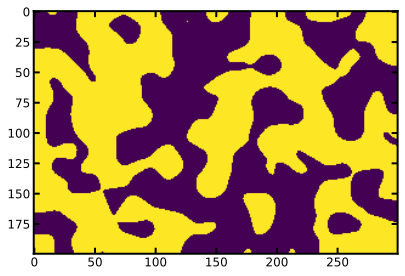

In [2]:
im = ps.generators.blobs(shape=[200, 300, 400])
fig, ax = plt.subplots()
ax.imshow(im[:, :, 50]);

All results in PoreSpy are reported in voxels, so it is up to the user to scale these values to the physical size of each voxel.  Here we'll assume that each voxel corresponds to 5.9 microns.

In [3]:
voxel_size = 5.9  # microns/voxel

The porosity profile function is straight-forward.  It only requires the binary image of the material, and a specification of along which axis to take the profile. Here we'll do all three directions:

In [4]:
x_profile = ps.metrics.porosity_profile(im, 0)
y_profile = ps.metrics.porosity_profile(im, 1)
z_profile = ps.metrics.porosity_profile(im, 2)

Now finally we can plot the profile in each direction using matplotlib:

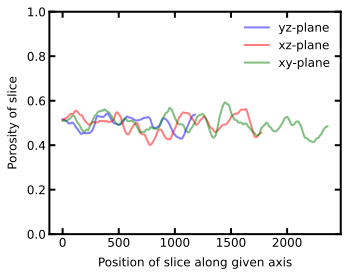

In [5]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(np.linspace(0, im.shape[0]*voxel_size, im.shape[0]), x_profile, 'b-', label='yz-plane', alpha=0.5)
ax.plot(np.linspace(0, im.shape[1]*voxel_size, im.shape[1]), y_profile, 'r-', label='xz-plane', alpha=0.5)
ax.plot(np.linspace(0, im.shape[2]*voxel_size, im.shape[2]), z_profile, 'g-', label='xy-plane', alpha=0.5)
ax.set_ylim([0, 1])
ax.set_ylabel('Porosity of slice')
ax.set_xlabel('Position of slice along given axis')
ax.legend();

Note how each line ends at a different position on the x-axis.  This is caused by the fact that image had different total length in each direction.  We can also do the plots with each axis normalized by their total length:

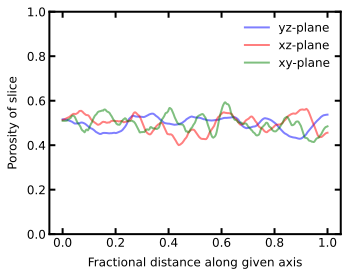

In [6]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(np.linspace(0, 1, im.shape[0]), x_profile, 'b-', label='yz-plane', alpha=0.5)
ax.plot(np.linspace(0, 1, im.shape[1], im.shape[1]), y_profile, 'r-', label='xz-plane', alpha=0.5)
ax.plot(np.linspace(0, 1, im.shape[2], im.shape[2]), z_profile, 'g-', label='xy-plane', alpha=0.5)
ax.set_ylim([0, 1])
ax.set_ylabel('Porosity of slice')
ax.set_xlabel('Fractional distance along given axis')
ax.legend();